In [19]:
import laspy
import coord_f
import matplotlib.pyplot as plt
import numpy
%matplotlib inline  
from owslib.wms import WebMapService
from PIL import Image
plt.rcParams['figure.figsize'] = [20, 20]


In [20]:
tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',


las_file = "lidar-files/1original/Wesel/3dm_32_324_5729_1_nw.laz"
las = laspy.read(las_file)
las_points_x = numpy.array(las.points['x']) 
las_points_y = numpy.array(las.points['y'])
x2, x1, y2, y1 = las_points_x.max(),  las_points_x.min(), las_points_y.max(),  las_points_y.min()



lat,long = coord_f.utm_to_lat_long(x2, y2)
lat_min,long_min = coord_f.utm_to_lat_long(x1, y1)


In [24]:



size=2000

wms_nrw = "https://www.wms.nrw.de/geobasis/wms_nw_dop"
nasa_map_key = "eb85268ac9785f26c2bd58bfe182fbe"

wms= WebMapService(wms_nrw, version='1.1.1',username='',  password="")
wms_content = list(wms.contents)
print(wms_content)
color_map = wms_content[3]
print(color_map)
print(wms.identification.version)
print('bounding box: ', wms[color_map].boundingBoxWGS84)
box=(long_min,lat_min,long,lat)

print('box', box)
#box = (5.59334, 50.0578, 9.74158, 52.7998)
img = wms.getmap(layers=[color_map],srs='EPSG:4326', bbox=box, format='image/jpeg',transparent=False, size=[size,size]) #
img =numpy.array(Image.open(img))

['WMS_NW_DOP', 'nw_dop_utm_info', 'nw_dop_rgb', 'nw_dop_cir', 'nw_dop_nir']
nw_dop_cir
1.1.1
bounding box:  (5.59334, 50.0578, 9.74158, 52.7998)
box (6.453965297384086, 51.68434360036539, 6.467914565939427, 51.693638655888655)


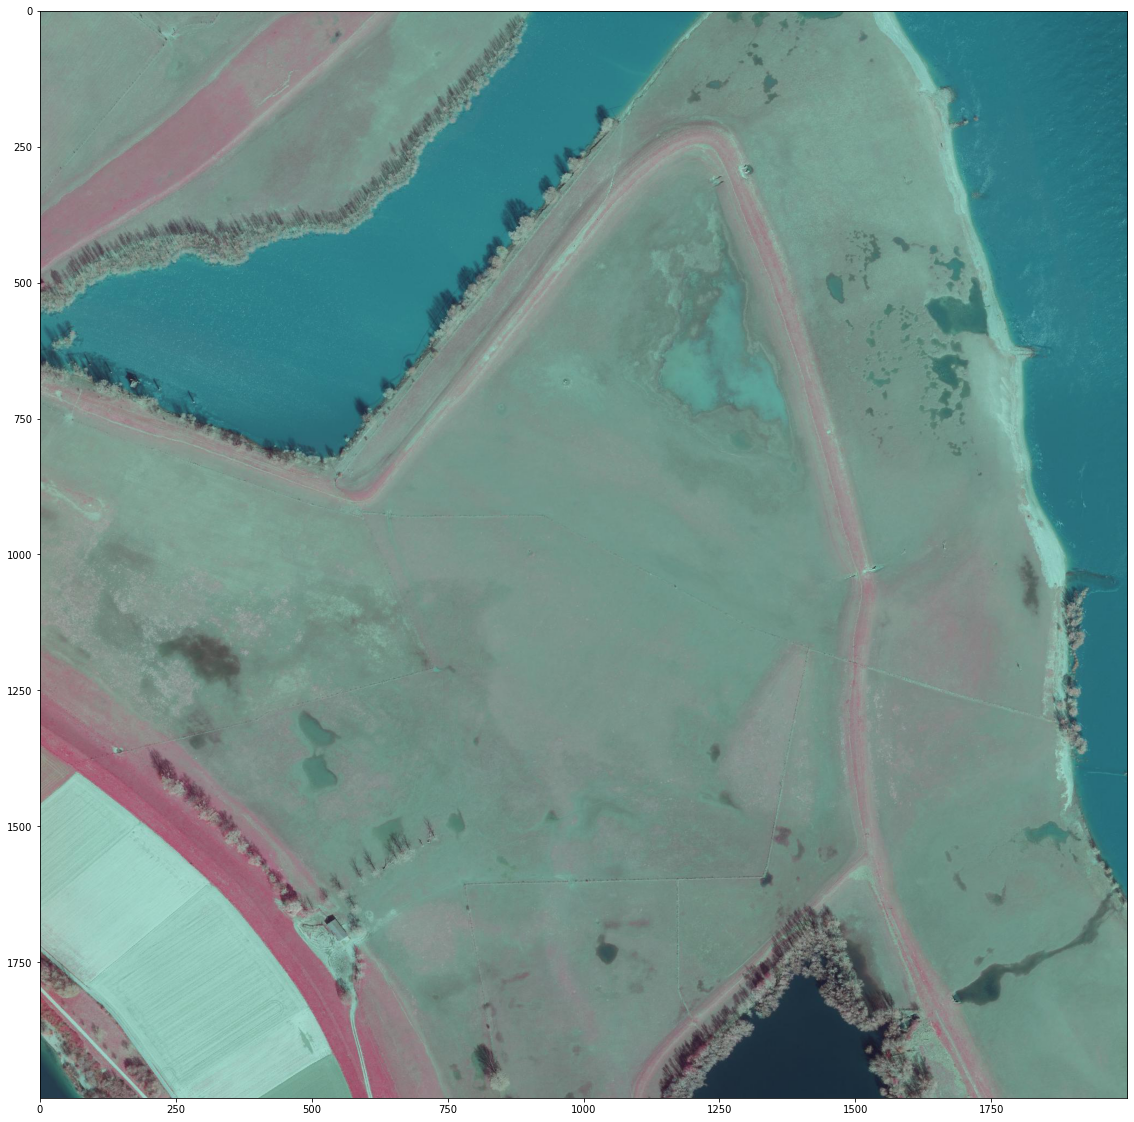

In [22]:
plt.imshow(img)
plt.show()